# Week2授業課題 富士下山

この課題の目的
- 機械学習で使われている勾配降下法の仕組みを知る

## 【問題1】 断面図の作成

In [2]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

#データの取得
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

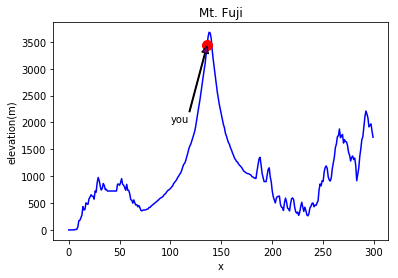

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#断面図を描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(136, fuji[136,3], marker = 'o', color = 'red', markersize = 10)

#矢印をつける
plt.annotate('you', xy=(136, fuji[136, 3]), xytext=(100, 2000), 
             arrowprops = dict(facecolor='purple', width =1.0, headwidth=7.0, headlength=7.0, shrink=0.01));

## 【問題2】 勾配の計算の関数

In [4]:
'''
勾配を求める関数
-------------------------
input
現在の地点：x

output
今の地点の勾配
'''
def gradient_calculate(x):
    
    #今いる地点が1~299の場合
    if 1 <= x and x <= 299:
        #xの変化量
        delta_x = fuji[x, 0] - fuji[x-1, 0]
        #yの変化量
        delta_y = fuji[x, 3] - fuji[x-1, 3]

        return delta_y / delta_x

    #1~299以外の場合
    else:
        print('1~299の整数で入力してください')

In [5]:
#今いる地点xが136のときの勾配
gradient_calculate(136)

168.35000000000036

## 【問題3】 勾配降下法の関数を作成

In [260]:
'''
勾配降下法の関数：gradient_descent_method

input
今いる地点：x
学習率：a

output
移動すべき地点
'''
def gradient_descent_method(x, a=0.2):
    
    #今いる地点が1~299の場合
    if 1 <= x and x <=299:
        return int(round(fuji[x, 0] - a * gradient_calculate(x)))
    
    #1~299以外の場合
    else:
        print('1~299の整数で入力してください')

In [261]:
#xが136の時
x = 136
x_movement = []

#勾配が正の時、勾配が0以下になる手前まで移動する
if gradient_calculate(x) > 0:
    while gradient_calculate(x) >= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x)

        
#勾配が負の時、勾配が0以上になる手前まで移動する
else:
    while gradient_calculate(x) <= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x)

#過程のリストを出力
print(x_movement)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73]


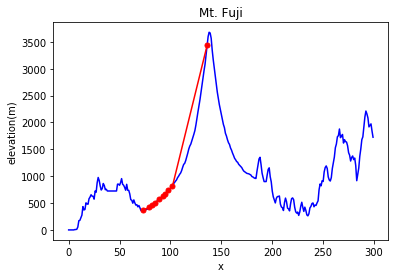

In [262]:
#グラフの描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(fuji[x_movement, 0], fuji[x_movement, 3], marker='o', color = 'red', markersize = 5);

## 【問題4】 初期値の変更

In [265]:
#xが139の時
x = 139
#ハイパーパラメータを0.3に設定
a = 0.3
x_movement = []

#勾配が正の時、勾配が0以下になる手前まで移動する

if gradient_calculate(x) > 0:
    while gradient_calculate(x) >= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x, a)
        
#勾配が負の時、勾配が0以上になる手前まで移動する
else:
    while gradient_calculate(x) <= 0:
                
        #リストの過程を追加
        x_movement.append(x)

        #xの地点を更新
        x = gradient_descent_method(x, a)
        
#過程のリストを出力
print(x_movement)

[139, 144, 191, 216]


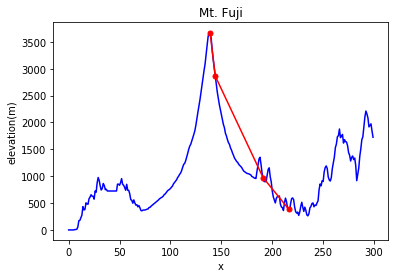

In [266]:
#グラフの描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(fuji[x_movement, 0], fuji[x_movement, 3], marker='o', color = 'red', markersize = 5);

## 【課題5】 並列計算

In [267]:
#0~299の1次元配列を取得
array1 = np.ones(300)
array2 = np.arange(300)
array3 = (array1*array2).astype(int)

In [271]:
#勾配を求める関数を修正
def re_gradient_calculate(x):
        
    #xの変化量
    delta_x = fuji[x, 0] - fuji[x-1, 0]
    #yの変化量
    delta_y = fuji[x, 3] - fuji[x-1, 3]

    return delta_y / delta_x

In [272]:
#勾配降下法の関数を修正
def re_gradient_descent_method(x, a=0.3):
    
    #numpy配列の時
    if type(x) == np.ndarray:
        
        #配列の要素数を取得
        num = len(x)
        
        #配列の要素ごとに計算
        for i in range(num):
            
            #勾配が正の時、勾配が負になる手前まで移動する
            if re_gradient_calculate(x[i]) > 0:
                while re_gradient_calculate(x[i]) >= 0:
                   
                    #xを出力
                    print(x)
                    
                    #xを更新
                    x = np.round(fuji[x, 0] - a * re_gradient_calculate(x)).astype(int)  
            
            #勾配が負の時、勾配が正になる手前まで移動する
            else:
                while gradient_calculate(x[i]) <= 0:
                    
                    #xを出力
                    print(x)
                    
                    #xを更新
                    x = np.round(fuji[x, 0] - a * re_gradient_calculate(x)).astype(int)
    
    
    #numpy配列以外の時
    else:
            #xの過程のリスト
            x_movement = []
            
            #勾配が正の時、勾配が負になる手前まで移動する
            if re_gradient_calculate(x) > 0:
                while re_gradient_calculate(x) >= 0:
                    
                    #リストの過程を追加
                    x_movement.append(x)
                    
                    #xを更新
                    x = (fuji[x, 0] - a * re_gradient_calculate(x)).astype(int)
            
            #勾配が負の時、勾配が正になる手前まで移動する
            else:
                while re_gradient_calculate(x) <= 0:
                                    
                    #リストの過程を追加
                    x_movement.append(x)
                    
                    #xを更新
                    x = (fuji[x, 0] - a * re_gradient_calculate(x)).astype(int)
                    
            return x_movement

In [276]:
#xが130~134の範囲の時
re_gradient_descent_method(array3[130:135])

[130 131 132 133 134]
[89 89 95 90 98]
[83 83 91 86 93]
[79 79 87 82 87]
[71 71 82 77 82]
[86 86 77 74 77]
[82 82 74 73 74]
[77 77 73 69 73]
[74 74 69 62 69]
[73 73 62 66 62]
[69 69 66 78 66]


## 【課題6】 ハイパーパラメータの検証

In [277]:
#ハイパーパラメータを0.1~0.4、0.01間隔で作成
a = np.arange(0.1, 0.41, 0.01)
a

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [278]:
#ハイパーパラメータを変えたときの最後の位置のリスト
hyper_x = []

#ハイパーパラメータの数だけ実行
for i in range(len(a)):
    
    #勾配降下法
    x = re_gradient_descent_method(136, a[i])
    
    #最後の位置をリストに格納
    hyper_x.append(x[-1])

print(hyper_x)

[73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 79, 79, 79, 79, 79, 69, 79, 69, 79, 73, 73, 69, 73, 73, 73, 73, 136, 136, 136]


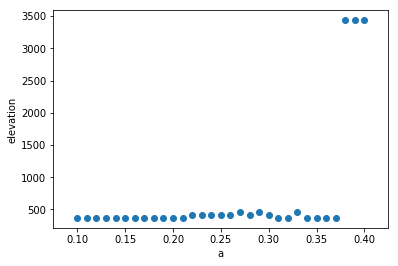

In [279]:
#グラフの出力、縦軸に標高、横軸にハイパーパラメータ
plt.xlabel('a')
plt.ylabel('elevation')
plt.scatter(a, fuji[hyper_x, 3]);

ハイパーパラメータが0.1~0.37の間では、ある程度低い位置まで山を降りることができていたが、ハイパーパラメータが0.38を超えると、山を降りることができなかった。つまり、ハイパーパラメータを大きくしすぎると、勾配降下法による最小値を求めることが難しくなる。

## 【課題7】局所最適解

局所最適解とは、ある範囲における最適解のことで、例えば、グラフに谷が複数存在する場合、ある谷の最小値が最適解になるといったものであり、その位置が全体の最適解になるとは限らないものである。